# Imports

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Histogram Equalization

In [20]:
image = cv2.imread('data/overexposed_image.png')

In [21]:
def get_histogram(values):
    hist = np.zeros(256, dtype=int)
    for i in values:
        hist[i] += 1
    return hist

hist = get_histogram(image.flatten())

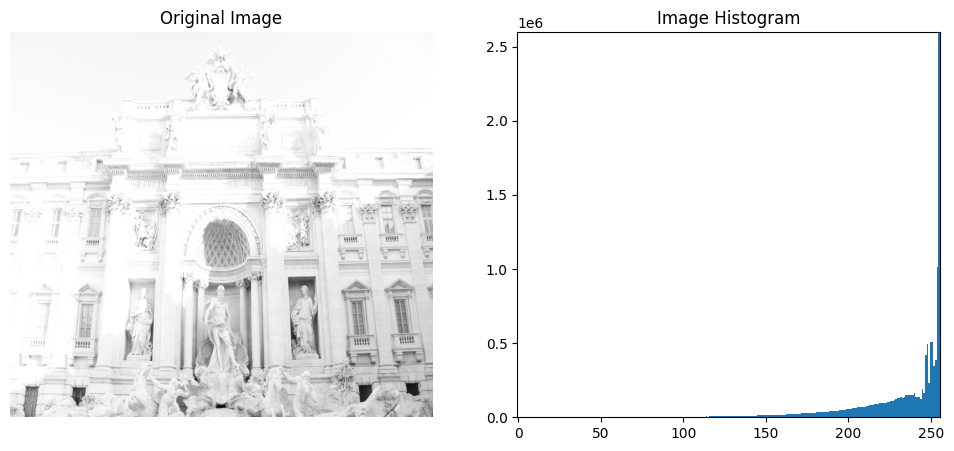

In [22]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.imshow(image, cmap="gray", aspect="auto")
ax1.set_title("Original Image")
ax1.axis("off")
ax2.bar(np.arange(256), hist, width=1)
ax2.set_title("Image Histogram")
ax2.margins(0);

The intuition behind Histogram Equalization (HEQ) is that a image $f$ such as the image above will have its contrast enhaced if its pixel intensities are evenly distributed, thus the aim of HEQ is to get an resulting image $g$ with a flat histogram.

Let $r_{k}$ $(r_{k} = k)$ be an intensity $k$ of the original image, and $s_{k}$ $(s_{k} = k)$ be an mapped intensity of the histogram equalized image that corresponds to the intensity $k$ of the original image. Let $h_{n}$ be the histogram of an image with each bin representing an intensity value.

$$p_{n} = \text{number of pixels with intensity n}$$

As already stated the histogram $h_{s}$ of $g$ must be constant and since our values range from $0$ to $L - 1$ it follows that:

$$h_{s} = \frac{N}{L - 1} \tag{1} $$

Where $N$ is the total number of pixels in the image.

To preserve the image integrity the number of pixels $r_{k}$ with intesity values up to $k$ in the original image must be the same as the number of pixels $s_{k}$ with intesity value up to $k$ in the histogram equalized image. The number of pixels $s_{k}$ with intesity value up to $k$ is equal to $\frac{N}{L - 1}$, the result found in $(1)$, times the intensity value $s_{k}$, thus it follows that:


$$\sum_{ r = 0}^{r_{k}}h_{k} = \frac{N}{L - 1}s_{k}$$

Rearranging the equation above we get:

$$s_{k} = (L - 1)\sum_{ r = 0}^{r_{k}}\frac{h_{k}}{N}$$

$\frac{h_{k}}{N}$ is the normalized histogram $p_{k}$ of the image, so it follows that:

$$s_{k} = (L - 1)\sum_{ r = 0}^{r_{k}}p_{k}$$

Where $\sum_{ r = 0}^{r_{k}}p_{k}$ is the cumulative histogram of $f$.

The above equation can be seen as a transform $T$ that takes as input the intesity values $r_{k}$ of $f$ and outputs the mapped intensity values $s_{k}$ of $g$:

$$s_{k} = T(r_{k}) = (L - 1)\sum_{ r = 0}^{r_{k}}p_{k}$$

Since digital images require integer intensity values the result above needs to be rounded  down to the nearest integer what is done by using the $floor()$ function:

$$s_{k} = T(r_{k}) = \text{floor(}(L - 1)\sum_{ r = 0}^{r_{k}}p_{k}) \tag{2}$$

The motivation for this transform comes from interpreting the intensities of $r$ of $f$ and $s$ of $g$ as continuous random variables $X$ and $Y$ on $[0, L − 1]$ with y defined as:

$$ y = T(x) = (L - 1)\int_{0}^{X}p_{X}(x)dx \tag{3}$$

Here $p_{X}$ is the probability density function of $f$. As we can see $(2)$ is basically an approximation of $(3)$ in the discrete domain, where $p_{X}$ is approximated by the normalized histogram $p_{k}$.

Now, we'll show that $y$ defined by $T(x)$ is uniformely distributed, i.e., $p_{Y}(y)$ is constant. From the probability theory we know that:

$$p_{Y}(y) = p_{X}(x)\left|\frac{dx}{dy}\right| \tag{4} $$

As follows:

$$\frac{dy}{dx} = \frac{dT(x)}{dx} $$

From $(3)$:

$$
\begin{align*}
\frac{dy}{dx} &=  \frac{\mathrm{d} }{\mathrm{d} r} \left ( (L - 1)\int_{0}^{X} p_{X}(x) dx \right ) \\
\frac{dy}{dx} &= (L - 1) p_{X}(x) \\
\frac{dx}{dy} &= \frac{1}{(L - 1) p_{X}(x)} \tag{4}\\
\end{align*}
$$

From $(4)$ and $(5)$:

$$
\begin{align*}
p_{Y}(y) &= p_{X}(x)\frac{1}{(L - 1) p_{X}(x)} \\
p_{Y}(y) &=  \frac{1}{(L - 1)} \blacksquare
\end{align*}
$$

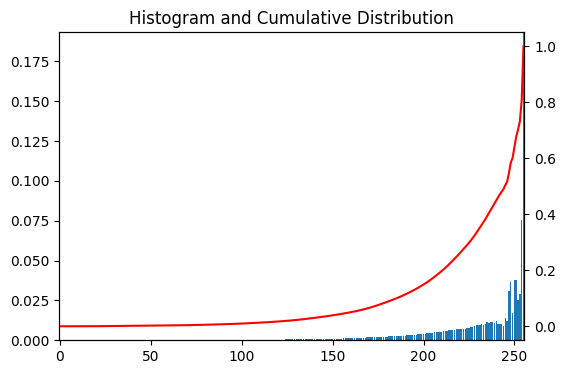

In [23]:
def get_normalized_histogram(values):
    return get_histogram(values) / values.size


def get_cumulative_distribution(values):
    hist = get_normalized_histogram(values)
    return np.cumsum(hist)


flat_image = image.flatten()
hist = get_normalized_histogram(flat_image)
cum_dist = get_cumulative_distribution(flat_image)
_, ax = plt.subplots(figsize=(6, 4))
ax.set_title("Histogram and Cumulative Distribution")
ax2 = ax.twinx()
ax.bar(np.arange(256), hist)
ax2.plot(cum_dist, "r")
ax.margins(0)
plt.show()

In [24]:
def histogram_equalization(image):
    flat_image = image.flatten()
    cum_dist = get_cumulative_distribution(flat_image)
    image_transform = np.floor(cum_dist[flat_image]*255).astype(int)
    heq_image = image_transform.reshape(image.shape)
    return heq_image

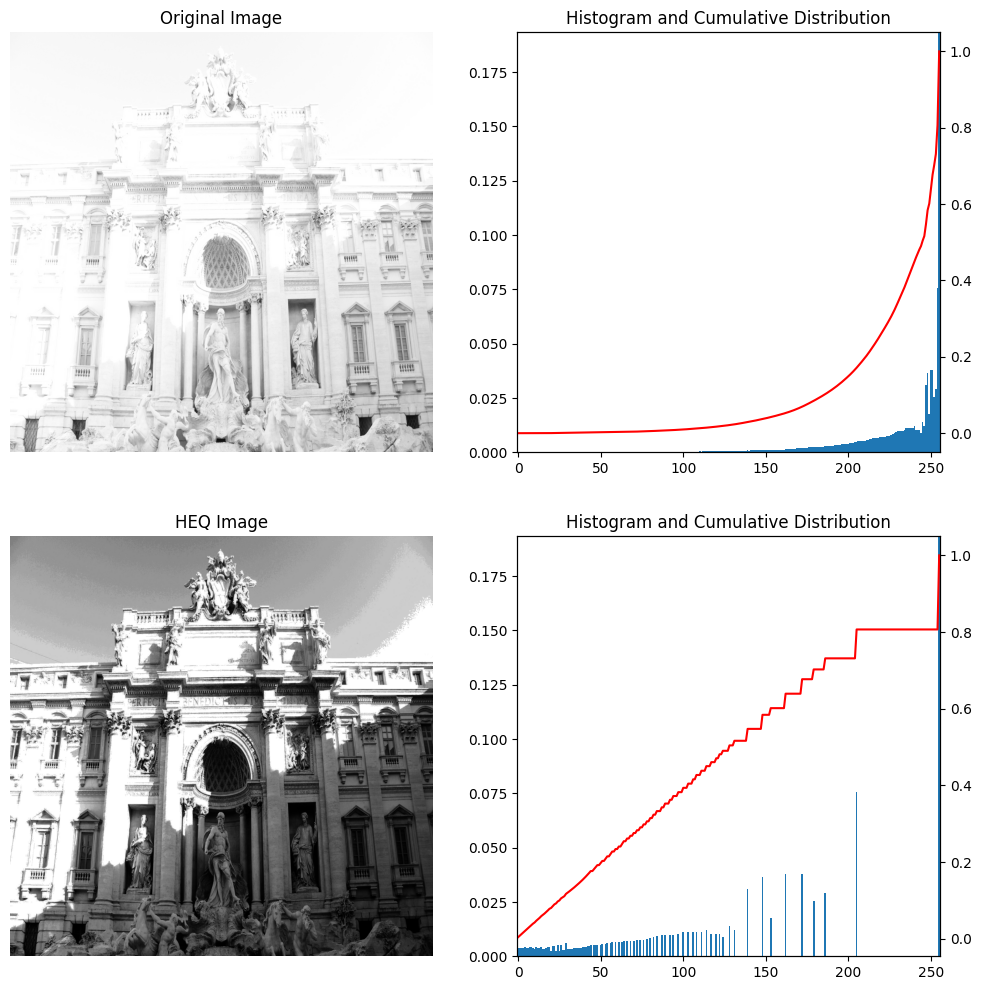

In [29]:
heq_image = histogram_equalization(image)
images = [image, heq_image]
image_titles = ["Original Image", "HEQ Image"]
hist_titles = ["Histogram and Cumulative Distribution"] * 2
_, axes = plt.subplots(2, 2, figsize=(12, 12))

for ax, img, img_title, hist_title in zip(axes, images, image_titles, hist_titles):
    flat_img = img.flatten()
    hist = get_normalized_histogram(flat_img)
    cum_dist = get_cumulative_distribution(flat_img)

    ax[0].imshow(img, cmap="gray", aspect="auto")
    ax[0].set_title(img_title)
    ax[0].axis("off")

    ax[1].bar(np.arange(256), hist, width=1)
    ax[1].margins(0)
    ax[1].set_title(hist_title)

    ax2 = ax[1].twinx()
    ax2.plot(cum_dist, "r")

References: 

- **Image and Video Processing: From Mars to Hollywood with a Stop at the Hospital**. Presented at Coursera by Professor Guillermo Sapiro
- **Histogram equalization**. https://en.wikipedia.org/wiki/Histogram_equalization
- **Histogram Equalization in Digital Image Processing**. https://www.geeksforgeeks.org/histogram-equalization-in-digital-image-processing/